In [1]:
import pandas as pd
df = pd.read_csv('/content/seattle-weather.csv')

df.drop(columns=['date'],inplace=True)

from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
df['weather'] = obj.fit_transform(df['weather'])

df['weather'].value_counts()

weather
2    641
4    640
1    101
0     53
3     26
Name: count, dtype: int64

In [2]:
df

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2
1457,1.5,5.0,1.7,1.3,2
1458,0.0,7.2,0.6,2.6,1
1459,0.0,5.6,-1.0,3.4,4


In [3]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
Series([], dtype: int64)


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.losses import SparseCategoricalCrossentropy


In [5]:
# Load the dataset
# df = pd.read_csv('/content/seattle-weather.csv')

# Select the feature you want to predict (e.g., Weather)
feature_name = 'weather'

In [6]:
# Normalize the data
scaler = MinMaxScaler()
df[feature_name] = scaler.fit_transform(df[[feature_name]])

In [7]:

# Number of time steps to look back
time_steps = 5


In [8]:
# Create sequences of data
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)


In [9]:
# Create sequences for the selected feature
data_sequence = df[feature_name].values
X, y = create_sequences(data_sequence, time_steps)


In [10]:
# One-hot encode the labels
y_onehot = to_categorical(y, num_classes=5)  # Assuming 5 unique classes

In [11]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, shuffle=False)

In [12]:
# Reshape the data for the LSTM input shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(64, activation='relu', return_sequences=True))  # Second LSTM layer
model.add(LSTM(64, activation='relu'))  # Third LSTM layer
model.add(Dense(5, activation='softmax'))  # 5 classes: assuming 5 unique classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
37/37 [==============================] - 4s 25ms/step - loss: 1.4030 - accuracy: 0.5610 - val_loss: 0.8583 - val_accuracy: 0.5034
Epoch 2/50
37/37 [==============================] - 0s 10ms/step - loss: 0.7113 - accuracy: 0.5601 - val_loss: 0.6952 - val_accuracy: 0.5034
Epoch 3/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6719 - accuracy: 0.5868 - val_loss: 0.6677 - val_accuracy: 0.6130
Epoch 4/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6677 - accuracy: 0.6074 - val_loss: 0.6736 - val_accuracy: 0.5685
Epoch 5/50
37/37 [==============================] - 0s 11ms/step - loss: 0.6697 - accuracy: 0.6108 - val_loss: 0.6716 - val_accuracy: 0.5616
Epoch 6/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6512 - accuracy: 0.6349 - val_loss: 0.6699 - val_accuracy: 0.5651
Epoch 7/50
37/37 [==============================] - 0s 10ms/step - loss: 0.6463 - accuracy: 0.6400 - val_loss: 0.6603 - val_accuracy: 0.5925
Epoch 8/50
37

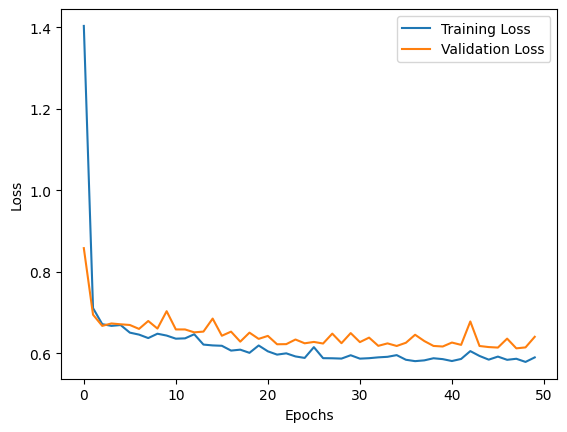

In [15]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


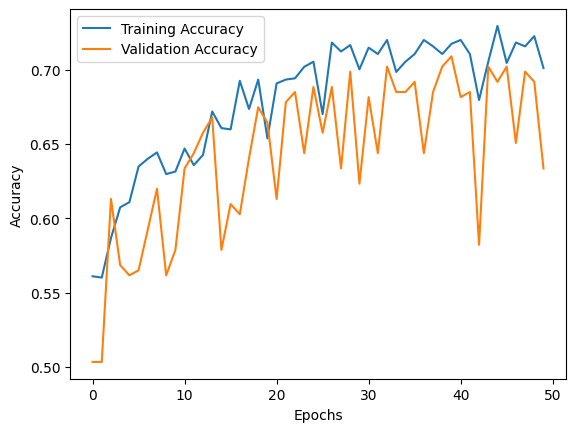

In [16]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

10/10 [==============================] - 0s 3ms/step


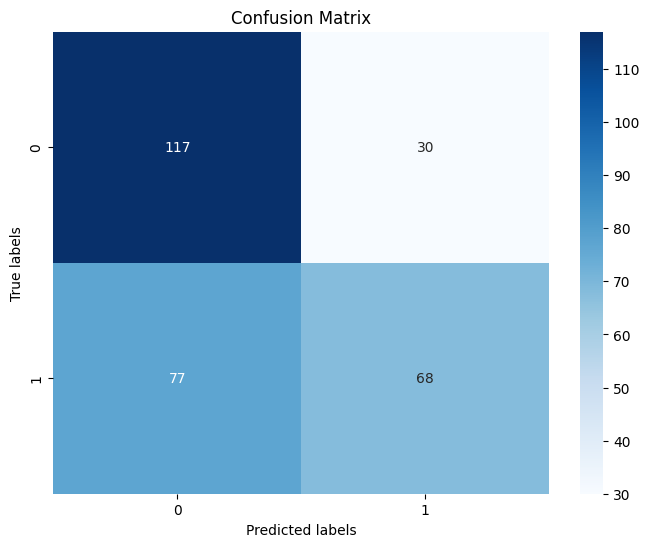

In [18]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [19]:
import pandas as pd
df = pd.read_csv('/content/seattle-weather.csv')

df.drop(columns=['date'],inplace=True)

from sklearn.preprocessing import LabelEncoder
obj = LabelEncoder()
df['weather'] = obj.fit_transform(df['weather'])

df['weather'].value_counts()

weather
2    641
4    640
1    101
0     53
3     26
Name: count, dtype: int64

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [21]:
# Load the dataset
# df = pd.read_csv('/content/seattle-weather.csv')

# Select the feature you want to predict (e.g., Weather)
feature_name = 'weather'


In [22]:
# Normalize the data
scaler = MinMaxScaler()
df[feature_name] = scaler.fit_transform(df[[feature_name]])


In [23]:
# Number of time steps to look back
time_steps = 5

In [24]:
# Create sequences of data
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [25]:
# Create sequences for the selected feature
data_sequence = df[feature_name].values
X, y = create_sequences(data_sequence, time_steps)


In [26]:
# One-hot encode the labels
y_onehot = to_categorical(y, num_classes=5)  # Assuming 5 unique classes

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, shuffle=False)

In [28]:
# Reshape the data for the RNN input shape
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [29]:
# Build the RNN model with two hidden layers
model = Sequential()
model.add(SimpleRNN(64, activation='relu', input_shape=(time_steps, 1), return_sequences=True))
model.add(SimpleRNN(64, activation='relu', return_sequences=True))  # First hidden layer
model.add(SimpleRNN(64, activation='relu', return_sequences=True))  # Second hidden layer
model.add(SimpleRNN(64, activation='relu'))  # Final SimpleRNN layer
model.add(Dense(5, activation='softmax'))  # 5 classes: assuming 5 unique classes
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
37/37 [==============================] - 4s 30ms/step - loss: 0.8951 - accuracy: 0.5172 - val_loss: 0.8460 - val_accuracy: 0.5034
Epoch 2/50
37/37 [==============================] - 0s 8ms/step - loss: 0.6767 - accuracy: 0.6040 - val_loss: 0.7180 - val_accuracy: 0.5034
Epoch 3/50
37/37 [==============================] - 0s 8ms/step - loss: 0.6377 - accuracy: 0.6400 - val_loss: 0.6568 - val_accuracy: 0.6370
Epoch 4/50
37/37 [==============================] - 0s 9ms/step - loss: 0.6345 - accuracy: 0.6306 - val_loss: 0.6633 - val_accuracy: 0.5856
Epoch 5/50
37/37 [==============================] - 0s 8ms/step - loss: 0.6052 - accuracy: 0.6821 - val_loss: 0.6285 - val_accuracy: 0.6712
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 0.6014 - accuracy: 0.7002 - val_loss: 0.6412 - val_accuracy: 0.6438
Epoch 7/50
37/37 [==============================] - 0s 9ms/step - loss: 0.5878 - accuracy: 0.7070 - val_loss: 0.6201 - val_accuracy: 0.6849
Epoch 8/50
37/37 [=

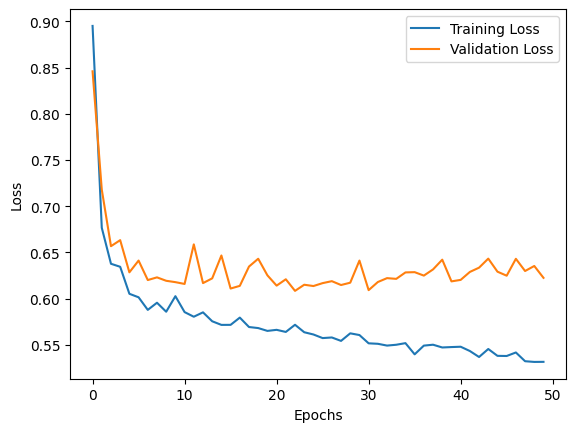

In [31]:

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

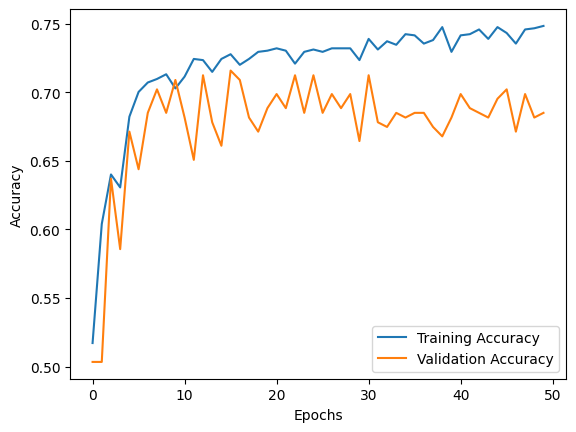

In [32]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)


10/10 [==============================] - 0s 3ms/step


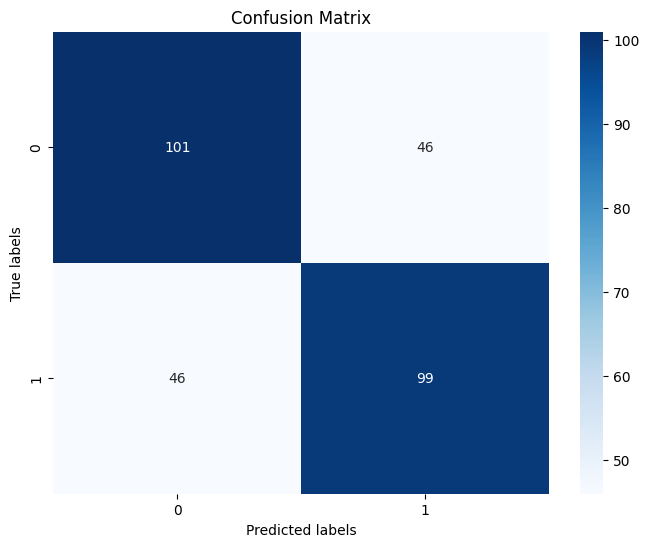

In [34]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 9.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=c65733b7fd09572ecae49935540e1a5eefec1d294b22e33e6d95b6d5b87566df
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [38]:

import nltk
from googletrans import Translator

In [39]:

def translate_text(text, source_lang, dest_lang):
    translator = Translator()
    translated = translator.translate(text, src=source_lang, dest=dest_lang)
    return translated.text

In [41]:

input_text = "Hello, how are you?"
translated_text = translate_text(input_text,'english','french')
print("Translated Text:", translated_text)

Translated Text: Bonjour comment allez-vous?
